# Linear Regression

## Overview

### 머신러닝의 학습 방법들  
- **Gradient descent based learning**  
- Probability theory based learning  
- Information theory based learning  
- Distance similarity based learning

#### Gradient descent based learning  
- 실제 값과 학습된 모델 예측치의 오차를 최소화  
- 모델의 최적 parameter 찾기가 목적

## Cost Function

## Normal equation

## Assignment - Normal equation

In [1]:
class LinearRegression(object):  
    def __init__(self, fit_intercept=True, copy_X=True):
        self.fit_intercept = fit_intercept
        self.copy_X = copy_X
        
        self._coef = None
        self._intercept = None
        self._new_X = None
        
    def fit(self, X, y):
        self._new_X = np.array(X)
        y = y.reshape(-1,1)
        
        if self.fit_intercept:
            intercept_vector = np.ones([len(self._new_X), 1])
            self._new_X = np.concatenate((intercept_vector, self._new_X), axis=1)
            
        weights = np.linalg.inv(self._new_X.T.dot(self._new)).dot(self._new_X.T.dot(y)).flatten()
        
        if self.fit_intercept:
            self._intercept = weights[0]
            self._coef = weoghts[1:]
        else:
            self._coef = weights[1:]

    def predict(self,X):
        test_X = np.array(X)
        
        if self.fit_intercept:
            intercept_vector = np.ones([len(test_X),1])
            test_X = np.concatenate((intercept_vector, test_X), axis = 1)
            
            weights = np.concatenate(([self._intercept], self._coef), axis=0)
        else:
            weights = self._coef
        return test_X.dot(weights)
    
    @property
    def coef(self):
        return self._coef
    
    @property
    def intercept(self):
        return self._intercept

In [2]:
import pandas as pd
import numpy as np

### Load Dataset - simple variable

In [3]:
df = pd.read_csv("./data/test_normal_equation.csv")
df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [4]:
X = df["x"].values.reshape(-1,1)
y = df["y"].values

### Build Model

In [5]:
import linear_model as linear_model
import imp
imp.reload(linear_model)

<module 'linear_model' from 'C:\\Users\\keogu\\linear_model.py'>

In [6]:
lr = linear_model.LinearRegression(fit_intercept=True)

In [7]:
lr.fit(X, y)

In [8]:
lr.coef

array([1.01433536])

In [9]:
lr.predict(X)[:10]

array([77.64201157, 20.83923168, 21.85356704, 19.82489633, 36.05426201,
       14.75321955, 62.42698124, 95.90004796, 19.82489633,  4.609866  ])

### Validation

In [10]:
from sklearn import linear_model
sk_lr = linear_model.LinearRegression(normalize=False)
sk_lr.fit(X, y)

LinearRegression()

In [11]:
sk_lr.intercept_

-0.4618107736611776

In [12]:
import numpy.testing as npt
npt.assert_almost_equal(sk_lr.intercept_, lr.intercept)

In [13]:
sk_lr.coef_

array([1.01433536])

In [14]:
np.isclose(lr.coef, sk_lr.coef_)

array([ True])

In [15]:
lr.predict(X)[:10]

array([77.64201157, 20.83923168, 21.85356704, 19.82489633, 36.05426201,
       14.75321955, 62.42698124, 95.90004796, 19.82489633,  4.609866  ])

In [16]:
df_test = pd.read_csv("./data/train_normal_equation.csv")
df_test.head()

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


In [17]:
X_test = df["x"].values.reshape(-1,1)

In [18]:
lr.predict(X_test)[:5]

array([77.64201157, 20.83923168, 21.85356704, 19.82489633, 36.05426201])

In [19]:
sk_lr.predict(X_test)[:5]

array([77.64201157, 20.83923168, 21.85356704, 19.82489633, 36.05426201])

### Load Dataset - multiple variables

In [20]:
df = pd.read_csv("./data/mlr09.csv")
df.head()

,height_in_feet,weight_in_pounds,successful_field_goals,percent_of_successful_free_throws,average_points_scored
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


In [21]:
y = df["average_points_scored"].values

In [22]:
df.iloc[:,:-1].head()

,height_in_feet,weight_in_pounds,successful_field_goals,percent_of_successful_free_throws
0,6.8,225,0.442,0.672
1,6.3,180,0.435,0.797
2,6.4,190,0.456,0.761
3,6.2,180,0.416,0.651
4,6.9,205,0.449,0.900


In [23]:
X = df.iloc[:,:-1].values

In [24]:
X[:5]

array([[  6.8  , 225.   ,   0.442,   0.672],
       [  6.3  , 180.   ,   0.435,   0.797],
       [  6.4  , 190.   ,   0.456,   0.761],
       [  6.2  , 180.   ,   0.416,   0.651],
       [  6.9  , 205.   ,   0.449,   0.9  ]])

### Rescaled

In [25]:
mu_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)

rescaled_X = (X - mu_X) / std_X

In [26]:
rescaled_X[:5]

array([[ 0.46843663,  0.50336336, -0.12692668, -0.70404955],
       [-0.63137111, -0.99746237, -0.25187012,  0.55584824],
       [-0.41140956, -0.66394554,  0.12296022,  0.19299768],
       [-0.85133266, -0.99746237, -0.59100234, -0.91571238],
       [ 0.68839818, -0.1636703 , -0.00198323,  1.59400403]])

### Validation

In [27]:
lr.fit(rescaled_X, y)

In [28]:
lr.coef

array([-1.67779283,  0.28359762,  2.68586629,  1.12816882])

In [29]:
lr.intercept

11.790740740740738

In [30]:
sk_lr.fit(rescaled_X, y)

LinearRegression()

In [31]:
sk_lr.coef_

array([-1.67779283,  0.28359762,  2.68586629,  1.12816882])

In [32]:
sk_lr.intercept_

11.790740740740736

## Gradient Descent

### 정해야 하는 것  
- Learning rate에 대한 선정  
- 얼마나 많이 loop을 돌 것인가?

In [33]:
import numpy as np
import matplotlib.pyplot as plt

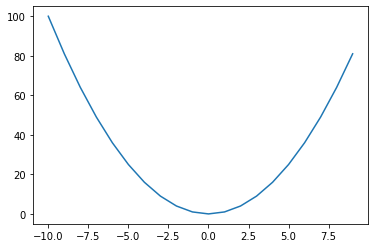

In [34]:
x= np.arange(-10,10,1)
f_x = x ** 2

plt.plot(x, f_x)
plt.show()

In [35]:
x_new = 10
derivative = []
y = []
learng_rate= 0.1
for i in range(100):
    old_value = x_new
    derivative.append(old_value - learng_rate * 2 * old_value)
    x_new = old_value - learng_rate *2* old_value
    y.append(x_new ** 2)

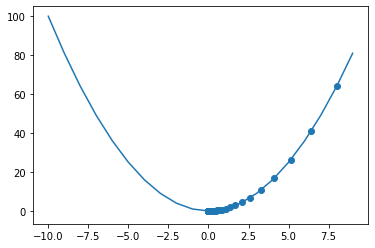

In [36]:
plt.plot(x, f_x)
plt.scatter(derivative, y)
plt.show()

In [37]:
def sin_function(x):
    return x * np.sin(x ** 2) + 1

def derivitive_f(x):
    return np.sin(x**2) + 2 * (x **2) * np.cos(x ** 2)

In [38]:
x= np.arange(-3,3,0.001)
f_x = sin_function(x)

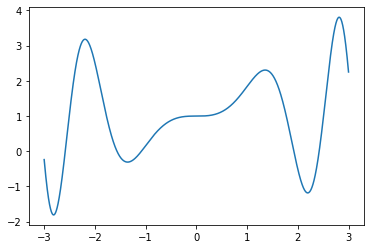

In [39]:
plt.plot(x, f_x)
plt.show()

In [40]:
derivitive_f(3)

-15.988226228682427

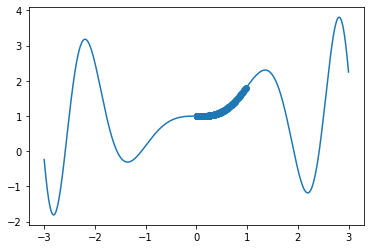

In [41]:
x_new = 1
derivative = []
y = []
learng_rate= 0.01
for i in range(10000):
    old_value = x_new
    x_new = old_value - learng_rate * derivitive_f(old_value)
    derivative.append(x_new)
    y.append(sin_function(x_new))

plt.plot(x, f_x)
plt.scatter(derivative, y)
plt.show()

## Linear Regression with GD & Implementation - 1

### Linear regression with GD  
- 임의의 theta0, theta1 값으로 초기화  
- Cost function이 최소화 될 때까지 학습  
- 더 이상 cost function이 줄어들지 않거나 학습 횟수를 초과할 때 종료  
- Learning rate, Iteration 횟수 등 Parameter 지정  
- Feature가 많으면 Normal equation에 비해 상대적으로 빠름  
- 최적값에 수렴하지 않을 수도 있음

## Linear Regression with GD & Implementation - 2

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [43]:
df = pd.read_csv("data/slr06.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [44]:
raw_X = df["X"].values.reshape(-1, 1)
y = df["Y"].values

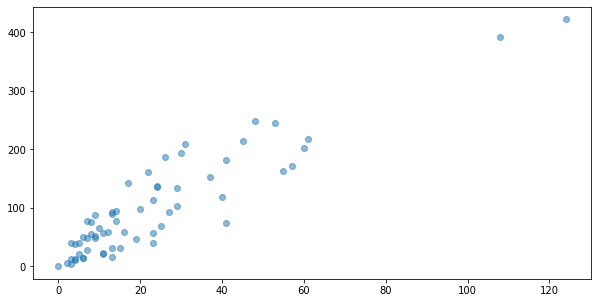

In [45]:
plt.figure(figsize=(10,5))
plt.plot(raw_X,y, 'o', alpha=0.5)

In [46]:
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]], dtype=int64),
 array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [47]:
np.ones((len(raw_X),1))[:3]

array([[1.],
       [1.],
       [1.]])

In [48]:
X = np.concatenate( (np.ones((len(raw_X),1)), raw_X ), axis=1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [49]:
w = np.random.normal((2,1)) 
# w = np.array([5,3])
w

array([0.71083781, 2.53806308])

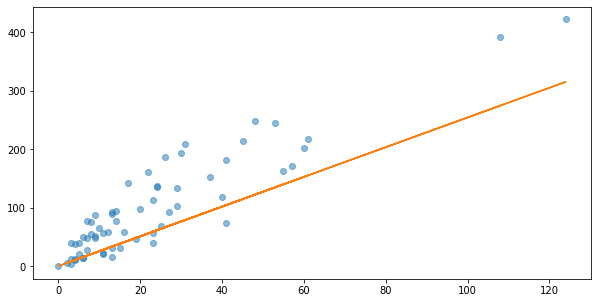

In [50]:
plt.figure(figsize=(10,5))
y_predict = np.dot(X, w)
plt.plot(raw_X,y,"o", alpha=0.5)
plt.plot(raw_X,y_predict)

In [51]:
def hypothesis_function(X, theta):
    return X.dot(theta)

In [52]:
h = hypothesis_function(X,w)

In [53]:
def cost_function(h, y):
    return (1/(2*len(y))) * np.sum((h-y)**2)

In [54]:
h = hypothesis_function(X,w)
cost_function(h, y)

1605.0927842879162

In [55]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])
        
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

In [56]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))


theta: [19.87175794  3.41647354]
cost: 625.3747729028037


In [57]:
theta_list[:10]

[[0.7108378144636085, 2.538063082390958],
 [0.7501805476350155, 3.909182531311389],
 [0.8455122685318422, 3.827295308923436],
 [0.9420774482124485, 3.8252102376927453],
 [1.0381556652926154, 3.8231356811394797],
 [1.1337493754460637, 3.8210715862397553],
 [1.2288610219629499, 3.8190179002371427],
 [1.323493035812313, 3.816974570641256],
 [1.4176478357042073, 3.8149415452264095],
 [1.5113278281515234, 3.812918772030282]]

In [58]:
theta_list = np.array(theta_list)

In [59]:
cost_list[:5]

[1605.0927842879162,
 722.404608466431,
 718.0808533264656,
 717.1481689781959,
 716.2248676645333]

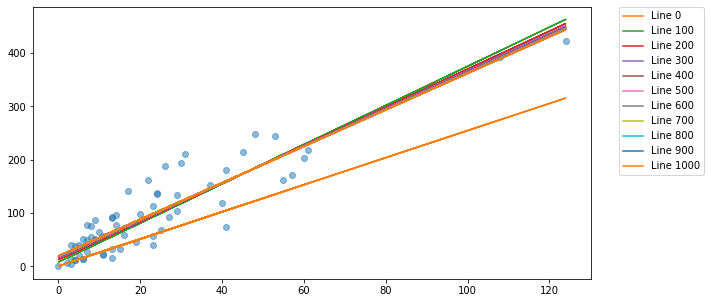

In [60]:
plt.figure(figsize=(10,5))

y_predict_step= np.dot(X, theta_list.transpose())

y_predict_step
plt.plot(raw_X,y,"o", alpha=0.5)
for i in range (0,len(cost_list),100):
    plt.plot(raw_X,y_predict_step[:,i], label='Line %d'%i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

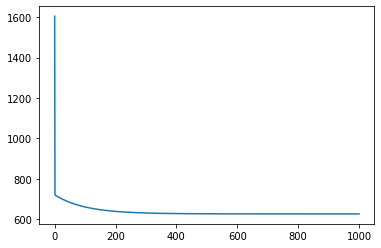

In [61]:
plt.plot(range(len(cost_list)), cost_list)

In [62]:
th0 = theta_list[:,0]
th1 = theta_list[:,1]
TH0, TH1 = np.meshgrid(th0, th1)

In [63]:
Js = np.array([cost_function(y, hypothesis_function(X, [th0, th1])) for th0, th1 in zip(np.ravel(TH0), np.ravel(TH1))])
Js = Js.reshape(TH0.shape)

<a list of 7 text.Text objects>

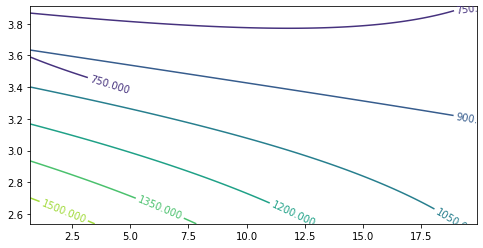

In [64]:
plt.figure(figsize=(8,4))
CS = plt.contour(TH0, TH1, Js)
plt.clabel(CS, inline=True, fontsize=10,inline_spacing=2)

In [65]:
from mpl_toolkits.mplot3d import Axes3D

ms = np.linspace(theta[0] - 15 , theta[0] + 15, 100)
bs = np.linspace(theta[1] - 15 , theta[1] + 15, 100)

M, B = np.meshgrid(ms, bs)

zs = np.array([ cost_function(y, hypothesis_function(X, theta))
    for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

C:\Users\keogu\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'color'
  """


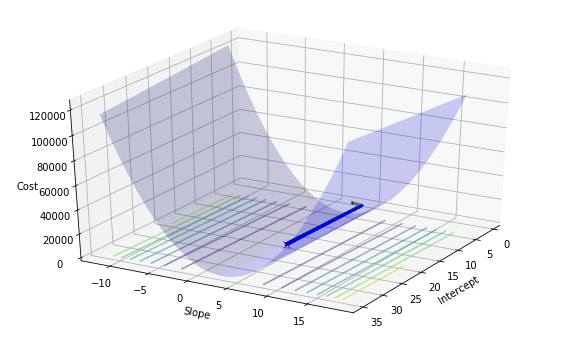

In [66]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 10, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost') 
ax.view_init(elev=30., azim=30)
ax.plot([theta[0]], [theta[1]], [cost_list[-1]] , markerfacecolor='r', markeredgecolor='r', marker='x', markersize=7);

ax.plot(theta_list[:,0], theta_list[:,1], cost_list, markerfacecolor='g', markeredgecolor='g', marker='o', 
                markersize=1);
ax.plot(theta_list[:,0], theta_list[:,1], 0 , markerfacecolor='b', markeredgecolor='b', marker='.', markersize=2);

## Multivariate Linear Regression  
- 한 개이상의 Feature로 구성된 데이터를 분석할 때

In [68]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

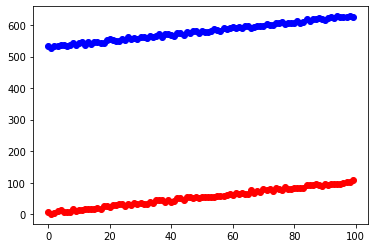

In [69]:
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 3))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = random.uniform(0, 1) * variance + i
        x[i][1] = random.uniform(0, 1) * variance + i
        x[i][2] = 1
        # our target variable
        y[i] = (i+bias) + random.uniform(0, 1) * variance + 500
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = gen_data(100, 25, 10)

plt.plot(x[:, 0:1], "ro")
plt.plot(y, "bo")

plt.show()

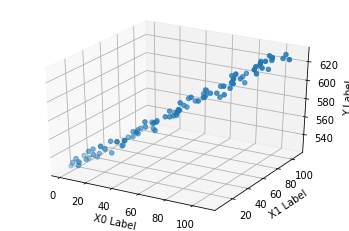

In [70]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)

ax.set_xlabel('X0 Label')
ax.set_ylabel('X1 Label')
ax.set_zlabel('Y Label')

plt.show()

In [71]:
def compute_cost(x, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size
    predictions = x.dot(theta)
    sqErrors = (predictions - y)

    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)
    return J

In [72]:
def minimize_gradient(x, y, theta, iterations=100000, alpha=0.01):
    
    m = y.size
    cost_history = []
    theta_history = []
    
    for _ in range(iterations):        
        predictions = x.dot(theta)
        
        for i in range(theta.size):
            partial_marginal = x[:, i]
            errors_xi = (predictions - y) * partial_marginal
            theta[i] = theta[i] - alpha * (1.0 / m) * errors_xi.sum()
        
        if _ % 1000 == 0:
            theta_history.append(theta)
            cost_history.append(compute_cost(x, y, theta))

    return theta, np.array(cost_history), np.array(theta_history)

In [73]:
theta_initial = np.ones(3)

theta, cost_history, theta_history = minimize_gradient(
        x, y,theta_initial, 300000, 0.0001)
print("theta", theta)

theta [4.98062711e-01 5.05665725e-01 5.24671436e+02]


In [74]:
from sklearn import  linear_model

regr = linear_model.LinearRegression()
regr.fit(x[:,:2], y)

# # The coefficients
print('Coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)

Coefficients:  [0.49900531 0.4940005 ]
intercept:  525.42135958998


In [75]:
print(np.dot(theta, x[10]))
print(regr.predict(x[10,:2].reshape(1,2)))

537.8009233036087
[538.40165571]


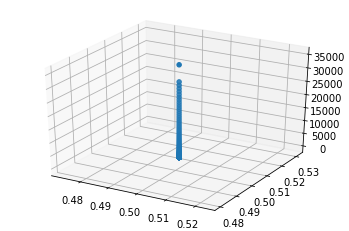

In [76]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(theta_history[:,0],theta_history[:,1], cost_history, zdir="z")


plt.show()

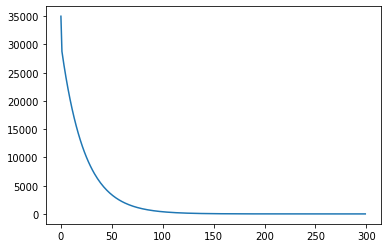

In [77]:
plt.plot(cost_history)
plt.show()